## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

## Create signals

In [2]:
freq = 1
ampl = 1
phi = 0

In [3]:
# datapoints
x = np.linspace(0, 50, 300)
#x = np.linspace(-np.pi, np.pi, 201)
y = ampl * np.sin(freq * x - phi)

In [4]:
# creat noise
np.random.seed(10)
noise = np.random.uniform(-0.3, 0.3, size = x.shape[0])
y_noisy = y + noise

## plot the clean and noisy signal

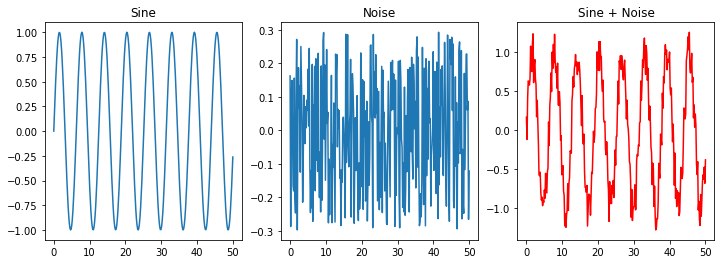

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
ax[0].set_title('Sine')
ax[0].plot(x, y)
ax[1].set_title('Noise')
ax[1].plot(x, noise)
ax[2].set_title('Sine + Noise')
ax[2].plot(x, y_noisy, 'r')

## create n_sample by sample_len, both clean and noisy

In [6]:

n_samples = 100
sample_len = 400

clean_sig = np.zeros((n_samples, sample_len))
noisy_sig = np.zeros((n_samples, sample_len))

for i in range (n_samples):  # i=0
    
    rand = np.random.uniform (0, 1)
    freq = 1+rand
    ampl = 1 + np.random.uniform (0, 1)
    #phi = 0 + np.random.uniform (0, 5)
    
    x = np.linspace(0, 50, sample_len)
    x = x + np.random.uniform (-10, 10)
    
    clean_sig [i, :] = ampl * np.sin(freq * x)
    noisy_sig [i, :] = clean_sig [i, :] + np.random.uniform (-0.4, 0.4, size=len(x))

## plot the clean and noisy signal

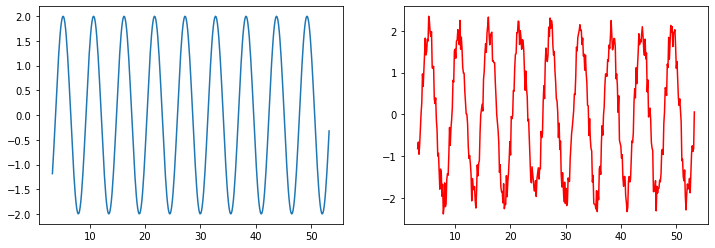

In [7]:
sample = 80
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
# ax[0].set_title('Sine')
ax[0].plot(x, clean_sig[sample, :])
ax[1].plot(x, noisy_sig[sample, :], 'r')

In [8]:
noisy_signals = noisy_sig.copy()
clean_signals = clean_sig.copy()

In [9]:
noisy_signals.shape

(100, 400)

## reshape (sample, length, featuers)

In [10]:

noisy_signals = noisy_signals.reshape(noisy_signals.shape[0],noisy_signals.shape[1],1)
clean_signals = clean_signals.reshape(clean_signals.shape[0],clean_signals.shape[1],1)

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#-- randomly assign the train and test set, useing sklearn
x_train, x_test, y_train, y_test = train_test_split(
    noisy_signals, clean_signals, test_size=0.15)

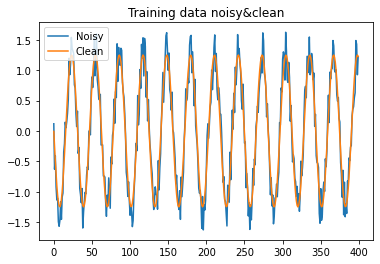

In [13]:
#-- Plot a sample signal
ind=2
fig, ax = plt.subplots()
plt.plot (x_test[ind,:], label="Noisy")
plt.plot (y_test[ind,:], label="Clean")
plt.title('Training data noisy&clean')
plt.legend()
plt.show()

## Importing the Keras libraries and packages

In [14]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from tensorflow.keras.layers import RepeatVector, TimeDistributed, Bidirectional

## define model

In [15]:
timesteps = x_train.shape[1]
No_of_features = x_train.shape[2]
No_epoch=10 
batch_size = 5

In [16]:

rnn_model = Sequential()
rnn_model.add(Bidirectional(GRU(units = 100, return_sequences = True,
                    activation='relu', input_shape = (timesteps, No_of_features))))

rnn_model.add(GRU(10, activation='relu', return_sequences=True))

#rnn_model.add(RepeatVector(timesteps))

rnn_model.add(GRU(10, activation='relu', return_sequences=True))
rnn_model.add(GRU(100, activation='relu', return_sequences=True))
rnn_model.add(TimeDistributed(Dense(1)))
#rnn_model.add(Dense(units = 1, activation='relu'))


In [63]:
rnn_model.compile(optimizer='adam', loss='mean_absolute_error')

In [87]:
rnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 400, 200)         61800     
 nal)                                                            
                                                                 
 gru_17 (GRU)                (None, 400, 10)           6360      
                                                                 
 gru_18 (GRU)                (None, 400, 10)           660       
                                                                 
 gru_19 (GRU)                (None, 400, 100)          33600     
                                                                 
 time_distributed_7 (TimeDis  (None, 400, 1)           101       
 tributed)                                                       
                                                                 
Total params: 102,521
Trainable params: 102,521
Non-tr

In [66]:
rnn_model.fit(x_train, y_train, epochs = No_epoch, 
              batch_size = batch_size)

Epoch 1/10
17/17 [==============================] - 67s 4s/step - loss: 0.8000
Epoch 2/10
17/17 [==============================] - 70s 4s/step - loss: 0.2402
Epoch 3/10
17/17 [==============================] - 64s 4s/step - loss: 0.1206
Epoch 4/10
17/17 [==============================] - 66s 4s/step - loss: 0.0988
Epoch 5/10
17/17 [==============================] - 69s 4s/step - loss: 0.0880
Epoch 6/10
17/17 [==============================] - 67s 4s/step - loss: 0.0864
Epoch 7/10
17/17 [==============================] - 62s 4s/step - loss: 0.0878
Epoch 8/10
17/17 [==============================] - 62s 4s/step - loss: 0.0830
Epoch 9/10
17/17 [==============================] - 68s 4s/step - loss: 0.0819
Epoch 10/10
17/17 [==============================] - 68s 4s/step - loss: 0.0797


## Predictions

In [67]:
#-- Predict the output for test set
x_test_pred = rnn_model.predict(x_test, verbose=1)

1/1 [==============================] - 2s 2s/step


In [18]:
#-- save the RNN model to be used later----------------------------------------
from keras.models import load_model
model_name = "LSTM_Auto_sine.h5"
# rnn_model.save(model_name)

In [19]:
#-- Load the model
rnn_model2 = load_model(model_name)

In [20]:
x_test_pred = rnn_model2.predict(x_test, verbose=1)

1/1 [==============================] - 6s 6s/step


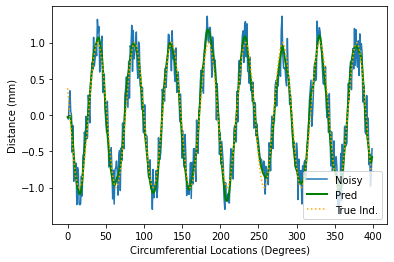

In [68]:
#-- plot the test results--------------
ind = 0
fig, ax = plt.subplots()

plt.plot (x_test[ind,:,0], label="Noisy")
plt.plot (x_test_pred[ind,:,0], color='g', linewidth=2,  label="Pred")
plt.plot (y_test[ind,], color = "orange", linestyle=':', linewidth=1.5,\
          label="True Ind.")

plt.legend()
plt.xlabel ("Circumferential Locations (Degrees)")
plt.ylabel ("Distance (mm)")
plt.show()

In [ ]:
#plt.savefig("x_test"+str(ind)+".tif", dpi=200, format='tif')

## Are there any chances of improvement?

In [83]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(units = 128, return_sequences = True,
                    activation='tanh', input_shape = (timesteps, No_of_features))))

model.add(LSTM(64, activation='tanh', return_sequences=True))

model.add(LSTM(16, activation='tanh', return_sequences=True))

#model.add(RepeatVector(timesteps))

model.add(LSTM(16, activation='tanh', return_sequences=True))

model.add(LSTM(64, activation='tanh', return_sequences=True))

model.add(LSTM(128, activation='tanh', return_sequences=True))

model.add(TimeDistributed(Dense(1)))
#rnn_model.add(Dense(units = 1, activation='relu'))

In [84]:
model.compile(optimizer='adam', loss='mse')

In [85]:
model.fit(x_train, y_train, epochs = 1000, 
              batch_size = 16, verbose=2)

Epoch 1/1000
6/6 - 9s - loss: 1.0252 - 9s/epoch - 2s/step
Epoch 2/1000
6/6 - 1s - loss: 0.4540 - 953ms/epoch - 159ms/step
Epoch 3/1000
6/6 - 1s - loss: 0.2735 - 1s/epoch - 167ms/step
Epoch 4/1000
6/6 - 1s - loss: 0.1830 - 1s/epoch - 171ms/step
Epoch 5/1000
6/6 - 1s - loss: 0.1246 - 998ms/epoch - 166ms/step
Epoch 6/1000
6/6 - 1s - loss: 0.1020 - 996ms/epoch - 166ms/step
Epoch 7/1000
6/6 - 1s - loss: 0.0861 - 949ms/epoch - 158ms/step
Epoch 8/1000
6/6 - 1s - loss: 0.0846 - 946ms/epoch - 158ms/step
Epoch 9/1000
6/6 - 1s - loss: 0.0689 - 958ms/epoch - 160ms/step
Epoch 10/1000
6/6 - 1s - loss: 0.0654 - 995ms/epoch - 166ms/step
Epoch 11/1000
6/6 - 1s - loss: 0.0631 - 1s/epoch - 173ms/step
Epoch 12/1000
6/6 - 1s - loss: 0.0574 - 1s/epoch - 171ms/step
Epoch 13/1000
6/6 - 1s - loss: 0.0552 - 944ms/epoch - 157ms/step
Epoch 14/1000
6/6 - 1s - loss: 0.0474 - 998ms/epoch - 166ms/step
Epoch 15/1000
6/6 - 1s - loss: 0.0445 - 992ms/epoch - 165ms/step
Epoch 16/1000
6/6 - 1s - loss: 0.0402 - 1s/epoch - 1

6/6 - 1s - loss: 0.0108 - 999ms/epoch - 167ms/step
Epoch 131/1000
6/6 - 1s - loss: 0.0105 - 1s/epoch - 169ms/step
Epoch 132/1000
6/6 - 1s - loss: 0.0102 - 1s/epoch - 170ms/step
Epoch 133/1000
6/6 - 1s - loss: 0.0100 - 1s/epoch - 172ms/step
Epoch 134/1000
6/6 - 1s - loss: 0.0103 - 987ms/epoch - 165ms/step
Epoch 135/1000
6/6 - 1s - loss: 0.0101 - 1s/epoch - 171ms/step
Epoch 136/1000
6/6 - 1s - loss: 0.0110 - 931ms/epoch - 155ms/step
Epoch 137/1000
6/6 - 1s - loss: 0.0094 - 937ms/epoch - 156ms/step
Epoch 138/1000
6/6 - 1s - loss: 0.0094 - 936ms/epoch - 156ms/step
Epoch 139/1000
6/6 - 1s - loss: 0.0092 - 897ms/epoch - 149ms/step
Epoch 140/1000
6/6 - 1s - loss: 0.0093 - 965ms/epoch - 161ms/step
Epoch 141/1000
6/6 - 1s - loss: 0.0098 - 986ms/epoch - 164ms/step
Epoch 142/1000
6/6 - 1s - loss: 0.0102 - 1s/epoch - 168ms/step
Epoch 143/1000
6/6 - 1s - loss: 0.0102 - 1s/epoch - 170ms/step
Epoch 144/1000
6/6 - 1s - loss: 0.0104 - 974ms/epoch - 162ms/step
Epoch 145/1000
6/6 - 1s - loss: 0.0099 - 93

Epoch 257/1000
6/6 - 1s - loss: 0.0056 - 943ms/epoch - 157ms/step
Epoch 258/1000
6/6 - 1s - loss: 0.0050 - 989ms/epoch - 165ms/step
Epoch 259/1000
6/6 - 1s - loss: 0.0054 - 975ms/epoch - 162ms/step
Epoch 260/1000
6/6 - 1s - loss: 0.0065 - 978ms/epoch - 163ms/step
Epoch 261/1000
6/6 - 1s - loss: 0.0068 - 911ms/epoch - 152ms/step
Epoch 262/1000
6/6 - 1s - loss: 0.0064 - 1s/epoch - 171ms/step
Epoch 263/1000
6/6 - 1s - loss: 0.0065 - 935ms/epoch - 156ms/step
Epoch 264/1000
6/6 - 1s - loss: 0.0055 - 978ms/epoch - 163ms/step
Epoch 265/1000
6/6 - 1s - loss: 0.0051 - 958ms/epoch - 160ms/step
Epoch 266/1000
6/6 - 1s - loss: 0.0060 - 955ms/epoch - 159ms/step
Epoch 267/1000
6/6 - 1s - loss: 0.0055 - 1000ms/epoch - 167ms/step
Epoch 268/1000
6/6 - 1s - loss: 0.0063 - 1s/epoch - 181ms/step
Epoch 269/1000
6/6 - 1s - loss: 0.0050 - 1s/epoch - 170ms/step
Epoch 270/1000
6/6 - 1s - loss: 0.0053 - 927ms/epoch - 155ms/step
Epoch 271/1000
6/6 - 1s - loss: 0.0055 - 969ms/epoch - 161ms/step
Epoch 272/1000
6/6

Epoch 383/1000
6/6 - 1s - loss: 0.0043 - 958ms/epoch - 160ms/step
Epoch 384/1000
6/6 - 1s - loss: 0.0051 - 963ms/epoch - 160ms/step
Epoch 385/1000
6/6 - 1s - loss: 0.0063 - 995ms/epoch - 166ms/step
Epoch 386/1000
6/6 - 1s - loss: 0.0050 - 1s/epoch - 169ms/step
Epoch 387/1000
6/6 - 1s - loss: 0.0037 - 1s/epoch - 173ms/step
Epoch 388/1000
6/6 - 1s - loss: 0.0034 - 986ms/epoch - 164ms/step
Epoch 389/1000
6/6 - 1s - loss: 0.0032 - 1s/epoch - 171ms/step
Epoch 390/1000
6/6 - 1s - loss: 0.0029 - 888ms/epoch - 148ms/step
Epoch 391/1000
6/6 - 1s - loss: 0.0030 - 985ms/epoch - 164ms/step
Epoch 392/1000
6/6 - 1s - loss: 0.0030 - 964ms/epoch - 161ms/step
Epoch 393/1000
6/6 - 1s - loss: 0.0040 - 967ms/epoch - 161ms/step
Epoch 394/1000
6/6 - 1s - loss: 0.0030 - 995ms/epoch - 166ms/step
Epoch 395/1000
6/6 - 1s - loss: 0.0030 - 956ms/epoch - 159ms/step
Epoch 396/1000
6/6 - 1s - loss: 0.0028 - 1s/epoch - 177ms/step
Epoch 397/1000
6/6 - 1s - loss: 0.0028 - 1s/epoch - 167ms/step
Epoch 398/1000
6/6 - 1s -

Epoch 510/1000
6/6 - 1s - loss: 0.0025 - 1s/epoch - 170ms/step
Epoch 511/1000
6/6 - 1s - loss: 0.0026 - 1s/epoch - 167ms/step
Epoch 512/1000
6/6 - 1s - loss: 0.0030 - 1s/epoch - 167ms/step
Epoch 513/1000
6/6 - 1s - loss: 0.0026 - 1s/epoch - 169ms/step
Epoch 514/1000
6/6 - 1s - loss: 0.0024 - 993ms/epoch - 165ms/step
Epoch 515/1000
6/6 - 1s - loss: 0.0021 - 1s/epoch - 175ms/step
Epoch 516/1000
6/6 - 1s - loss: 0.0025 - 1s/epoch - 170ms/step
Epoch 517/1000
6/6 - 1s - loss: 0.0024 - 1s/epoch - 170ms/step
Epoch 518/1000
6/6 - 1s - loss: 0.0021 - 1s/epoch - 175ms/step
Epoch 519/1000
6/6 - 1s - loss: 0.0019 - 1s/epoch - 170ms/step
Epoch 520/1000
6/6 - 1s - loss: 0.0021 - 941ms/epoch - 157ms/step
Epoch 521/1000
6/6 - 1s - loss: 0.0021 - 999ms/epoch - 166ms/step
Epoch 522/1000
6/6 - 1s - loss: 0.0022 - 940ms/epoch - 157ms/step
Epoch 523/1000
6/6 - 1s - loss: 0.0020 - 998ms/epoch - 166ms/step
Epoch 524/1000
6/6 - 1s - loss: 0.0019 - 1s/epoch - 167ms/step
Epoch 525/1000
6/6 - 1s - loss: 0.0018 -

Epoch 638/1000
6/6 - 1s - loss: 0.0014 - 1s/epoch - 168ms/step
Epoch 639/1000
6/6 - 1s - loss: 0.0017 - 951ms/epoch - 159ms/step
Epoch 640/1000
6/6 - 1s - loss: 0.0018 - 991ms/epoch - 165ms/step
Epoch 641/1000
6/6 - 1s - loss: 0.0020 - 973ms/epoch - 162ms/step
Epoch 642/1000
6/6 - 1s - loss: 0.0019 - 971ms/epoch - 162ms/step
Epoch 643/1000
6/6 - 1s - loss: 0.0022 - 971ms/epoch - 162ms/step
Epoch 644/1000
6/6 - 1s - loss: 0.0021 - 1s/epoch - 170ms/step
Epoch 645/1000
6/6 - 1s - loss: 0.0017 - 1s/epoch - 170ms/step
Epoch 646/1000
6/6 - 1s - loss: 0.0021 - 959ms/epoch - 160ms/step
Epoch 647/1000
6/6 - 1s - loss: 0.0019 - 1s/epoch - 169ms/step
Epoch 648/1000
6/6 - 1s - loss: 0.0016 - 985ms/epoch - 164ms/step
Epoch 649/1000
6/6 - 1s - loss: 0.0015 - 970ms/epoch - 162ms/step
Epoch 650/1000
6/6 - 1s - loss: 0.0015 - 989ms/epoch - 165ms/step
Epoch 651/1000
6/6 - 1s - loss: 0.0015 - 995ms/epoch - 166ms/step
Epoch 652/1000
6/6 - 1s - loss: 0.0015 - 1s/epoch - 168ms/step
Epoch 653/1000
6/6 - 1s -

Epoch 765/1000
6/6 - 1s - loss: 0.0015 - 939ms/epoch - 157ms/step
Epoch 766/1000
6/6 - 1s - loss: 0.0017 - 997ms/epoch - 166ms/step
Epoch 767/1000
6/6 - 1s - loss: 0.0018 - 1s/epoch - 172ms/step
Epoch 768/1000
6/6 - 1s - loss: 0.0017 - 959ms/epoch - 160ms/step
Epoch 769/1000
6/6 - 1s - loss: 0.0018 - 1s/epoch - 167ms/step
Epoch 770/1000
6/6 - 1s - loss: 0.0015 - 1s/epoch - 170ms/step
Epoch 771/1000
6/6 - 1s - loss: 0.0016 - 969ms/epoch - 161ms/step
Epoch 772/1000
6/6 - 1s - loss: 0.0014 - 916ms/epoch - 153ms/step
Epoch 773/1000
6/6 - 1s - loss: 0.0015 - 1s/epoch - 178ms/step
Epoch 774/1000
6/6 - 1s - loss: 0.0018 - 968ms/epoch - 161ms/step
Epoch 775/1000
6/6 - 1s - loss: 0.0019 - 1s/epoch - 170ms/step
Epoch 776/1000
6/6 - 1s - loss: 0.0022 - 914ms/epoch - 152ms/step
Epoch 777/1000
6/6 - 1s - loss: 0.0023 - 985ms/epoch - 164ms/step
Epoch 778/1000
6/6 - 1s - loss: 0.0020 - 931ms/epoch - 155ms/step
Epoch 779/1000
6/6 - 1s - loss: 0.0026 - 1s/epoch - 167ms/step
Epoch 780/1000
6/6 - 1s - lo

Epoch 891/1000
6/6 - 1s - loss: 0.0012 - 953ms/epoch - 159ms/step
Epoch 892/1000
6/6 - 1s - loss: 0.0011 - 952ms/epoch - 159ms/step
Epoch 893/1000
6/6 - 1s - loss: 0.0017 - 1s/epoch - 170ms/step
Epoch 894/1000
6/6 - 1s - loss: 0.0024 - 943ms/epoch - 157ms/step
Epoch 895/1000
6/6 - 1s - loss: 0.0026 - 999ms/epoch - 167ms/step
Epoch 896/1000
6/6 - 1s - loss: 0.0020 - 977ms/epoch - 163ms/step
Epoch 897/1000
6/6 - 1s - loss: 0.0024 - 891ms/epoch - 148ms/step
Epoch 898/1000
6/6 - 1s - loss: 0.0018 - 1s/epoch - 167ms/step
Epoch 899/1000
6/6 - 1s - loss: 0.0018 - 969ms/epoch - 162ms/step
Epoch 900/1000
6/6 - 1s - loss: 0.0021 - 1s/epoch - 169ms/step
Epoch 901/1000
6/6 - 1s - loss: 0.0020 - 1s/epoch - 170ms/step
Epoch 902/1000
6/6 - 1s - loss: 0.0022 - 1s/epoch - 167ms/step
Epoch 903/1000
6/6 - 1s - loss: 0.0026 - 997ms/epoch - 166ms/step
Epoch 904/1000
6/6 - 1s - loss: 0.0023 - 999ms/epoch - 166ms/step
Epoch 905/1000
6/6 - 1s - loss: 0.0025 - 991ms/epoch - 165ms/step
Epoch 906/1000
6/6 - 1s -

1/1 [==============================] - 0s 232ms/step


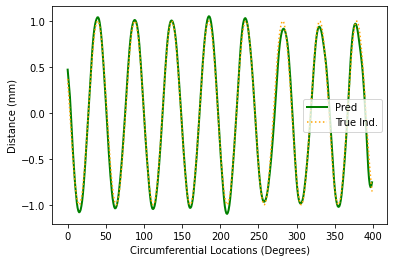

In [88]:
#-- Predict the output for test set
x_test_pred = model.predict(x_test, verbose=1)

#-- plot the test results--------------
ind = 0
fig, ax = plt.subplots()

plt.plot (x_test[ind,:,0], label="Noisy")
plt.plot (x_test_pred[ind,:,0], color='g', linewidth=2,  label="Pred")
plt.plot (y_test[ind,], color = "orange", linestyle=':', linewidth=1.5,\
          label="True Ind.")

plt.legend()
plt.xlabel ("Circumferential Locations (Degrees)")
plt.ylabel ("Distance (mm)")
plt.show()

In [89]:
model_name = "Big_LSTM_Auto_sine.h5"
model.save(model_name)